# iLykei Lecture Series 

# Machine Learning

# Decision Trees

# Workshop 4    

## Y.Balasanov, L.Nazarov &copy; iLykei 2017-24


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import pydotplus
from IPython.display import Image
from io import StringIO  

We will also use function *plot_tree* for visualisation.

In [2]:
def plot_tree(estimator,feature_names):
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data,feature_names=feature_names,
                   rounded=True,filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png()) 

# Wisconsin Breast Cancer Data    

This data set was obtained from UCI Machine Learning Repository.    
Official reference: Lichman, M. (2013). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science.

Data set information is [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29).


Read the data.

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
features = ['V'+i for i in '123456789']
datBreastCancer = pd.read_csv(url,names=['Id']+features+['Class'])
datBreastCancer.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Columns of the data frame are:    

* `Id` - subject Id    
* `V1` to `V9` - attributes    
* `Class` - diagnosis: 4 = malignant, 2 = benign

Some observations have missing values "?". Reading the column with "?", *pandas* creates string column (i.e. series of string objects) in data frame. Replace "?" with -1 and change column type to integer.

In [4]:
datBreastCancer.replace('?',-1,inplace=True)
datBreastCancer.dtypes

Id        int64
V1        int64
V2        int64
V3        int64
V4        int64
V5        int64
V6       object
V7        int64
V8        int64
V9        int64
Class     int64
dtype: object

Missing values, marked by "?" are found only in column *V6*.

In [5]:
datBreastCancer['V6'] = datBreastCancer.V6.astype(int)
type(datBreastCancer.V6[0])

numpy.int64

Total dimension of the data set and the number of malignant diagnoses:

In [6]:
print(datBreastCancer.shape)
sum(datBreastCancer.Class==4)/len(datBreastCancer)

(699, 11)


0.3447782546494993

Fit classification tree with moderate level of *min_impurity_decrease* to make analysis easier.

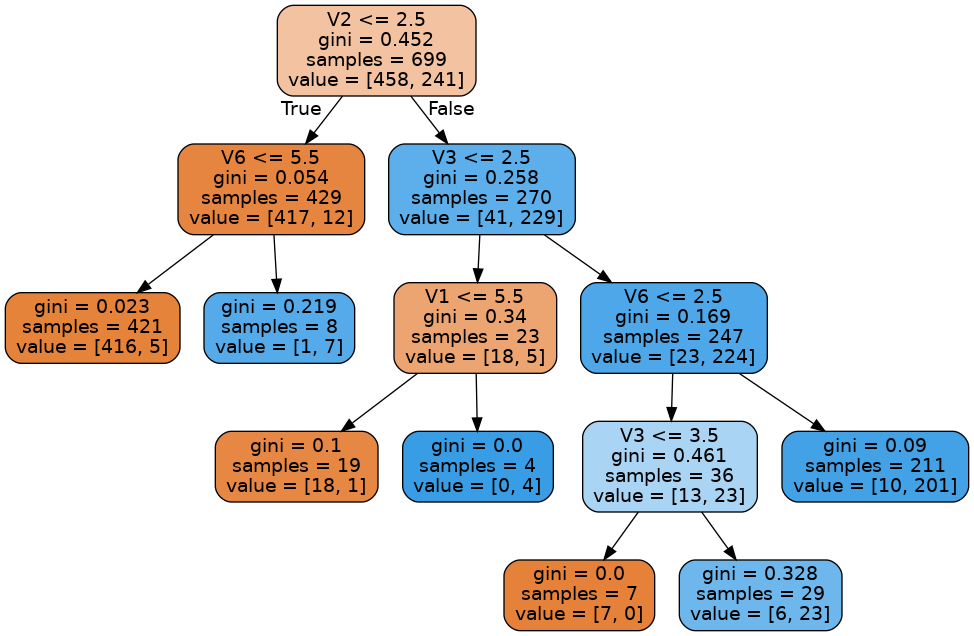

In [7]:
X,y = datBreastCancer[features],datBreastCancer.Class
prunedTree = DecisionTreeClassifier(random_state=0,min_impurity_decrease=0.008)
prunedTree.fit(X,y)
plot_tree(prunedTree,features)

1. Observe the tree.    
2. Define event $E_1$ as `E1={(V2>2.5),(V3>2.5),V6>2.5}`. Calculate probability $P(E_1)$     
3. Calculate probability $P(4|E_1)$    
4. Define event $E(V6=2)$ as all combinations of events (paths on the tree) including event $V6=2$. Calculate probability $P(4|E(V6=2))$    
5. Define event $E(V3=3)$ as all combinations of events (paths on the tree) satisfying $V3=3$. Calculate probability $P(4|E(V3=3))$     
6. Calculate probability $P(E_1|4)$ using Bayes Theorem and directly from the observed data    

<span style="color:red">(Skipped Code)</span>